<a href="https://colab.research.google.com/github/Analia-Rivera/-Ciencia_de_datos-Pre_entregas/blob/main/Pre_entrega_2_ciberseguridad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE ENTREGA 2

TEMA: Ciberseguridad. Ataques cibernéticos.

Los ataques cibernéticos son acciones maliciosas dirigidas a sistemas informáticos, redes o dispositivos con el objetivo de robar, alterar o destruir información. Entre los más comunes se encuentran el phishing (engaño para obtener datos personales), malware (software malicioso como virus o ransomware), ataques DDoS (saturación de servidores para interrumpir servicios) y exploits (aprovechamiento de vulnerabilidades del sistema). Estos ataques pueden afectar tanto a individuos como a empresas y gobiernos, causando pérdidas económicas, robo de identidad y daño a la reputación.


DATASET: Descargado de Kaggel, https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data

El objetivo es ver que tipo de ataques ciberneticos, el nivel que tuvo, en que zonas de la region y las acciones tomadas al respecto.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
  #Importamos las librerias y leemos el dataset

In [ ]:
ciberseguridad = pd.read_csv('/content/cybersecurity_attacks.csv')

In [ ]:
ciberseguridad.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [ ]:
ciberseguridad.isna().sum()
  #visualizamos todos los faltantes

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


Columnas con muchos valores nulos:

Malware Indicators (50% nulos)

Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts (50% nulos también

In [ ]:
ciberseguridad.shape

(40000, 25)

In [ ]:
ciberseguridad.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


/tmp/ipython-input-24-2055395843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ciberseguridad, x='Attack Type', order=ciberseguridad['Attack Type'].value_counts().index, palette='Set2')


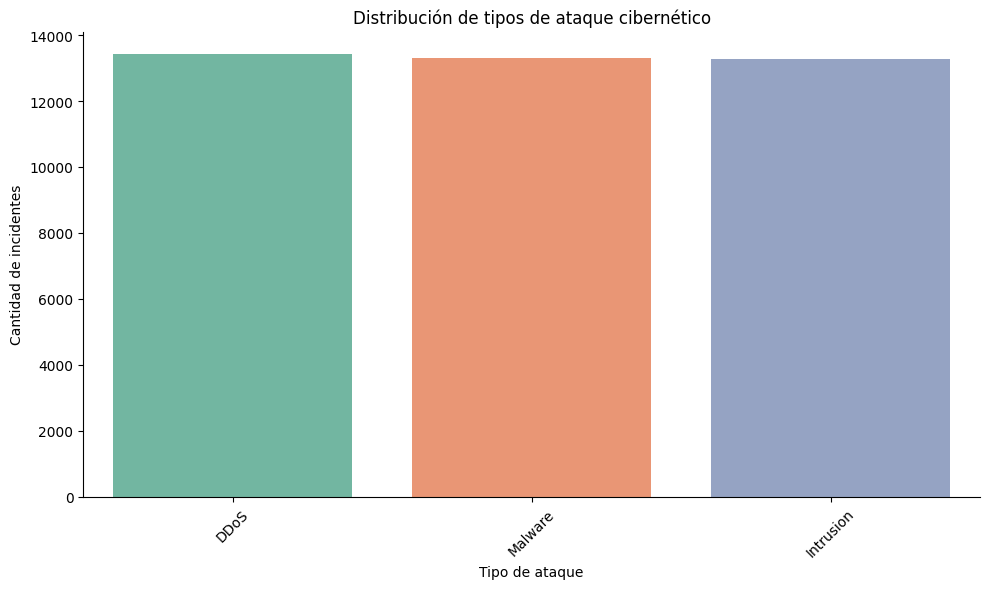

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=ciberseguridad, x='Attack Type', order=ciberseguridad['Attack Type'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribución de tipos de ataque cibernético')
plt.xlabel('Tipo de ataque')
plt.ylabel('Cantidad de incidentes')
sns.despine()
plt.tight_layout()
plt.show()


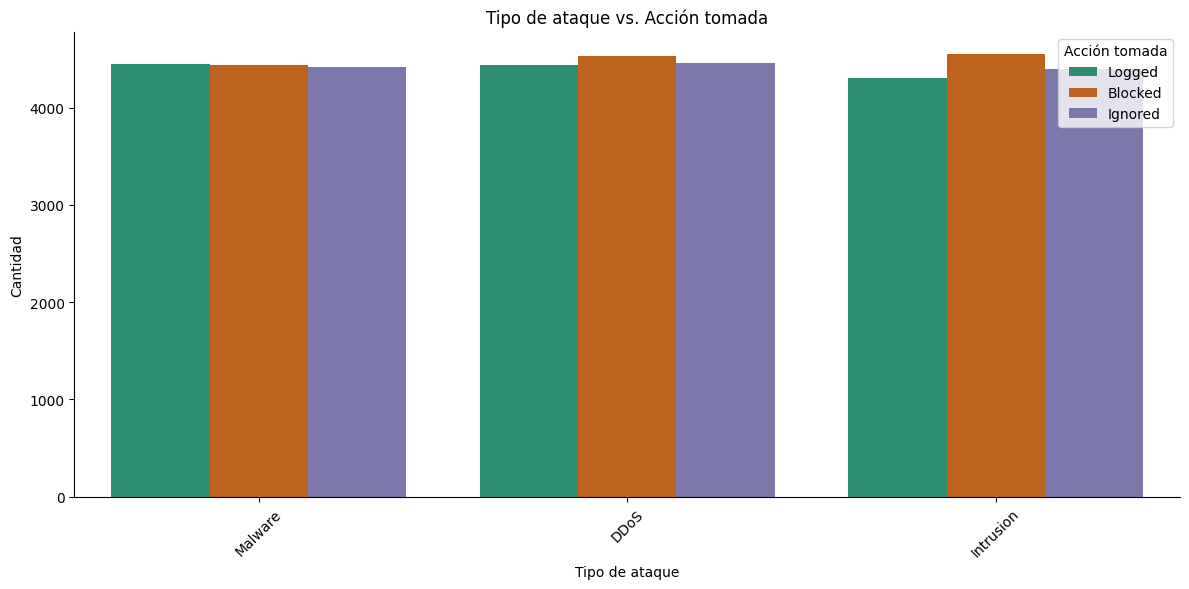

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=ciberseguridad, x='Attack Type', hue='Action Taken', palette='Dark2')
plt.xticks(rotation=45)
plt.title('Tipo de ataque vs. Acción tomada')
plt.xlabel('Tipo de ataque')
plt.ylabel('Cantidad')
plt.legend(title='Acción tomada')
sns.despine()
plt.tight_layout()
plt.show()


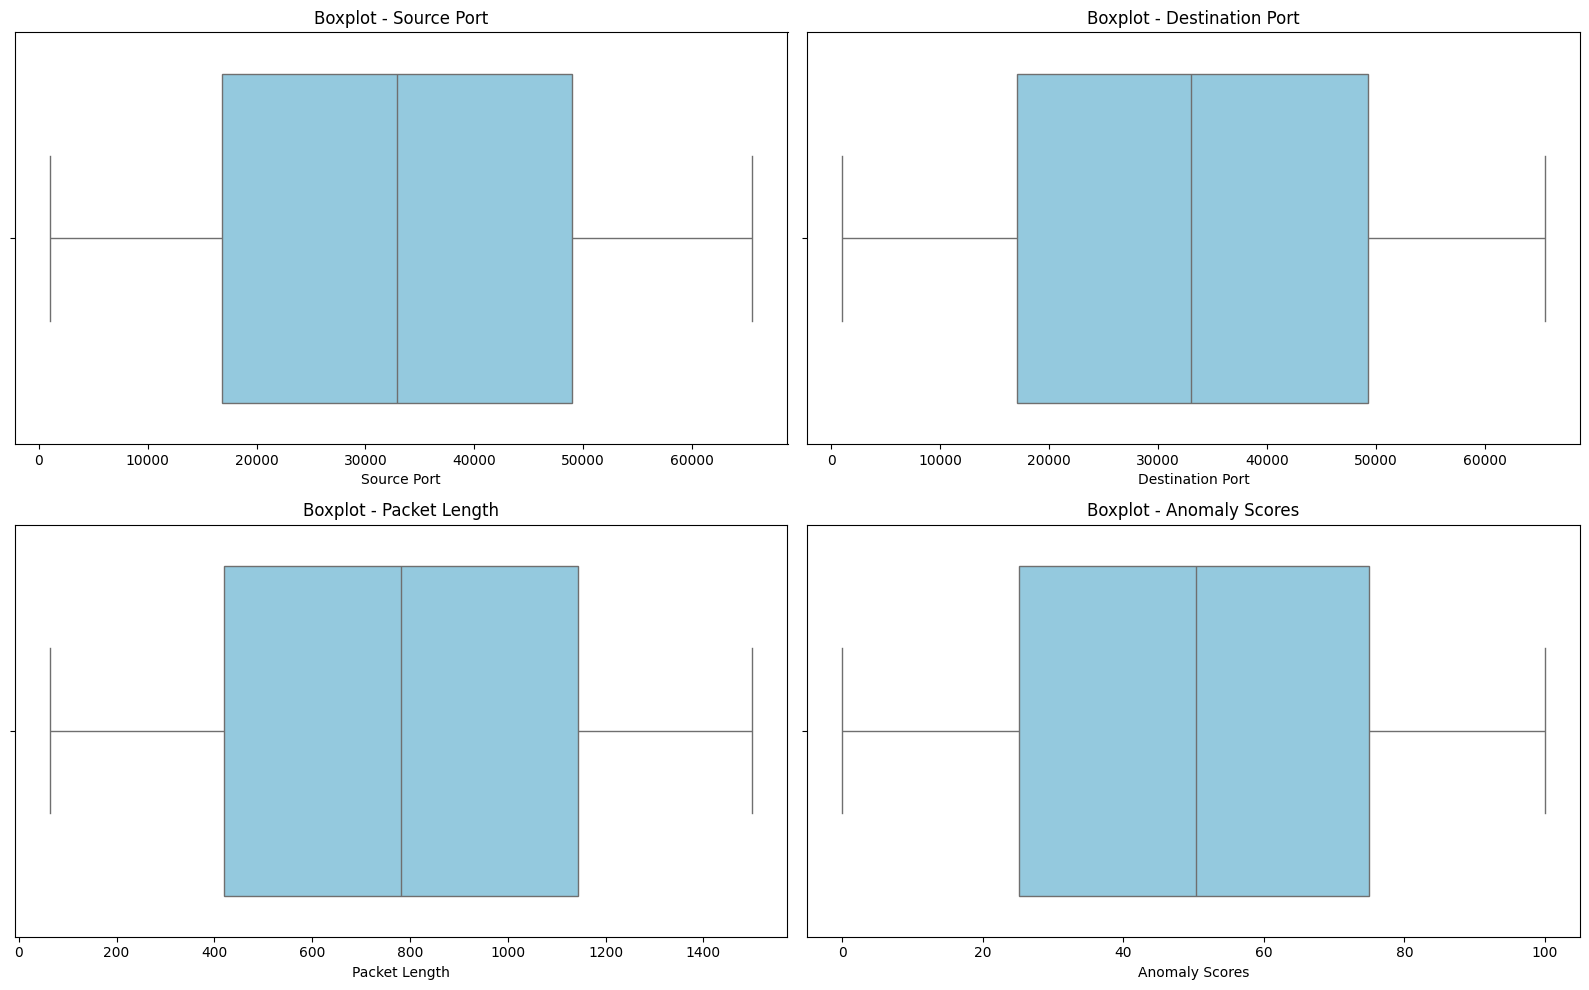

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas donde querés ver los outliers
num_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

# Crear boxplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    # Use the original ciberseguridad DataFrame which contains these columns
    sns.boxplot(x=ciberseguridad[col], color='skyblue')
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

Source Port y Destination Port: muestran valores atípicos en ambos extremos, especialmente cerca de los valores máximos.

Packet Length: hay muchos valores por encima del percentil 75 (más de ~1140).

Anomaly Scores: presenta algunos valores extremos cercanos al 0 y al 100.

Estos gráficos indican que hay datos que podrían considerarse outliers estadísticos, lo cual puede afectar modelos como clustering o regresión.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cantidad de ataques por tipo
ciberseguridad['Attack Type'].value_counts()


,count
Attack Type,
DDoS,13428
Malware,13307
Intrusion,13265


In [ ]:
ciberseguridad.groupby('Attack Type')['Anomaly Scores'].mean().sort_values(ascending=False)

,Anomaly Scores
Attack Type,
DDoS,50.235063
Malware,50.125794
Intrusion,49.978029


In [ ]:
ciberseguridad.columns
  #features

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
ciberseguridad['Attack Type'].value_counts()
  #vemos que tipo de ataques hay

,count
Attack Type,
DDoS,13428
Malware,13307
Intrusion,13265


In [ ]:
ciberseguridad.dtypes
  #vemos el tipo de datos de las features

,0
Timestamp,object
Source IP Address,object
Destination IP Address,object
Source Port,int64
Destination Port,int64
Protocol,object
Packet Length,int64
Packet Type,object
Traffic Type,object
Payload Data,object


In [ ]:
# Imputar valores faltantes en 'Anomaly Scores' con la media
ciberseguridad ['Anomaly Scores'].fillna(ciberseguridad['Anomaly Scores'].mean(), inplace=True)

/tmp/ipython-input-36-911296076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ciberseguridad ['Anomaly Scores'].fillna(ciberseguridad['Anomaly Scores'].mean(), inplace=True)


winsorizar usando percentiles 5 y 95

In [ ]:
# Calcular percentiles
q_low = ciberseguridad['Anomaly Scores'].quantile(0.05)
q_high = ciberseguridad['Anomaly Scores'].quantile(0.95)

# Winsorización (recortar valores extremos)
ciberseguridad['Anomaly Scores'] = np.where(
    ciberseguridad['Anomaly Scores'] < q_low, q_low,
    np.where(ciberseguridad['Anomaly Scores'] > q_high, q_high, ciberseguridad['Anomaly Scores'])
)

standarizar con z-core

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ciberseguridad['Anomaly Scores zscore'] = scaler.fit_transform(ciberseguridad[['Anomaly Scores']])

esto transforma los datos a media=0  desvio standar =1

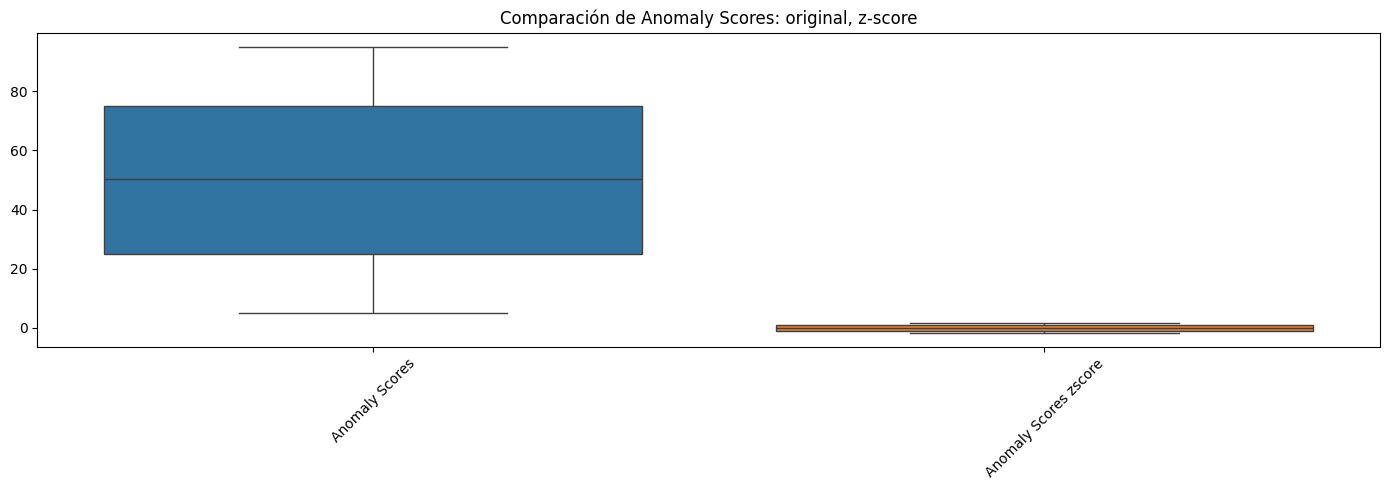

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

sns.boxplot(data=ciberseguridad[['Anomaly Scores', 'Anomaly Scores zscore']])
plt.title("Comparación de Anomaly Scores: original, z-score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusión del Análisis de Outliers y Preprocesamiento

Para trabajar de forma efectiva con el campo Anomaly Scores del dataset de ataques cibernéticos:

Se imputaron valores faltantes con la media, manteniendo la coherencia de los datos sin eliminar filas.

Se aplicó winsorización utilizando los percentiles 5 y 95, lo cual permitió recortar outliers extremos sin eliminar datos, preservando así la estructura general del dataset.Los percentiles nos permiten identificar los extremos de una distribución sin asumir que los datos siguen una forma específica (como una distribución normal).

Cuando usamos:

Percentil 5 (P5): indica que el 5% de los datos están por debajo de ese valor.

Percentil 95 (P95): indica que el 5% de los datos están por encima de ese valor.

Usarlos es una forma robusta de recortar valores extremos  sin alterar el resto de los datos.

Luego, se estandarizó (z-score) esta variable para llevarla a una escala normalizada, con media 0 y desviación estándar 1. Esto es fundamental para aplicar algoritmos de clustering como K-Means, que son sensibles a la escala.

La visualización antes y después demostró cómo los valores atípicos fueron suavizados, facilitando un análisis más robusto y confiable.


 Conclusión general:

Este flujo de trabajo mejora la calidad del dataset, elimina distorsiones por outliers y prepara los datos para análisis más avanzados como clustering o detección de anomalías, sin perder información relevante.

